In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
original = pd.read_csv('Data_Train.csv', sep = ';')
df = original.copy()

In [3]:
df.dropna(subset=['educacion'], inplace=True)

df.isnull().sum()

ID                                   0
edad                                 0
trabajo                              0
estado_civil                         0
educacion                            0
deuda                                0
saldo                                0
vivienda                             0
prestamo                             0
tipo_contacto                    12072
duracion                             0
fecha_contacto                       0
campaign                             0
tiempo_transcurrido                  0
contactos_anteriores                 0
resultado_campanas_anteriores    34670
target                               0
dtype: int64

In [4]:
# Reemplaza los valores nulos en las columnas especificadas con "Sin Información"
df[['tipo_contacto', 'resultado_campanas_anteriores']] = df[['tipo_contacto', 'resultado_campanas_anteriores']].fillna("Sin Información")

df.isnull().sum()

ID                               0
edad                             0
trabajo                          0
estado_civil                     0
educacion                        0
deuda                            0
saldo                            0
vivienda                         0
prestamo                         0
tipo_contacto                    0
duracion                         0
fecha_contacto                   0
campaign                         0
tiempo_transcurrido              0
contactos_anteriores             0
resultado_campanas_anteriores    0
target                           0
dtype: int64

In [5]:
df['educacion'] = df['educacion'].replace('priamaria', 'primaria')

In [6]:
df.sample(5)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
15809,15810,40,blue-collar,casado,primaria,no,-7,si,no,Sin Información,410,6-may-2021,2,-1,0,Sin Información,no
30566,30567,42,services,casado,secundaria/superiores,no,0,si,no,Sin Información,132,7-may-2021,3,-1,0,Sin Información,no
11885,11886,45,services,casado,secundaria/superiores,no,27,si,si,movil,43,31-jul-2021,2,-1,0,Sin Información,no
16970,16971,55,blue-collar,casado,primaria,no,3297,si,si,fijo,96,30-apr-2021,1,-1,0,Sin Información,no
2214,2215,31,admin.,casado,secundaria/superiores,no,413,si,no,Sin Información,574,14-may-2021,2,-1,0,Sin Información,no


In [7]:
df_train = df.copy()
df_train.sample(3)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
38566,38567,33,technician,divorciado,secundaria/superiores,no,295,no,no,movil,360,19-aug-2021,2,-1,0,Sin Información,no
5592,5593,45,blue-collar,casado,primaria,no,103,no,no,movil,64,28-jan-2021,3,-1,0,Sin Información,no
23317,23318,54,admin.,divorciado,secundaria/superiores,no,791,no,si,movil,66,10-jul-2021,1,-1,0,Sin Información,no


In [8]:
columns_to_delete = ['fecha_contacto', 'ID']
df_train.drop(columns=columns_to_delete,inplace=True)

df_train.sample(3)

,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
8899,26,services,casado,secundaria/superiores,no,864,si,si,movil,466,1,-1,0,Sin Información,no
21369,31,self-employed,casado,secundaria/superiores,no,581,si,no,movil,303,3,174,3,sin_exito,no
28848,27,blue-collar,casado,secundaria/superiores,no,556,si,no,movil,11,7,-1,0,Sin Información,no


In [9]:
#Instancio el OneHot
onehot=OneHotEncoder()

# Aplico el OneHot a la columna job y guardo el resultao en a
onehot.fit(df_train[['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores','target']])
a=onehot.transform(df_train[['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores','target']])

# Convierto el a en data frame y lo llamo encoded_df
encoded_df = pd.DataFrame(a.toarray(), columns=onehot.get_feature_names_out(['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores','target']))

# Reseteo el índice de los dos data frames antes de concatenarlos
df_train.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# concateno los dos data frames y los guardo machacando el df
df_train=pd.concat([df_train,encoded_df],axis=1)

# Elimino la columna Job original antigua, la categórica
df_train.drop(columns=['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores','target'],inplace=True)

# Muestro tamaño yu sample del data frame df transformado
print(df_train.shape)
df_train.sample(5)

(42446, 39)


,edad,saldo,duracion,campaign,tiempo_transcurrido,contactos_anteriores,trabajo_admin.,trabajo_blue-collar,trabajo_entrepreneur,trabajo_housemaid,...,prestamo_si,tipo_contacto_Sin Información,tipo_contacto_fijo,tipo_contacto_movil,resultado_campanas_anteriores_Sin Información,resultado_campanas_anteriores_exito,resultado_campanas_anteriores_otro,resultado_campanas_anteriores_sin_exito,target_no,target_si
11774,40,819,100,3,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
10325,42,352,79,3,-1,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
534,47,449,92,4,-1,0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
18587,44,-82,181,1,-1,0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3370,28,62,467,3,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [10]:
df_train.columns

Index(['edad', 'saldo', 'duracion', 'campaign', 'tiempo_transcurrido',
       'contactos_anteriores', 'trabajo_admin.', 'trabajo_blue-collar',
       'trabajo_entrepreneur', 'trabajo_housemaid', 'trabajo_management',
       'trabajo_retired', 'trabajo_self-employed', 'trabajo_services',
       'trabajo_student', 'trabajo_technician', 'trabajo_unemployed',
       'trabajo_unknown', 'estado_civil_casado', 'estado_civil_divorciado',
       'estado_civil_soltero', 'educacion_primaria',
       'educacion_secundaria/superiores', 'educacion_universitarios',
       'deuda_no', 'deuda_si', 'vivienda_no', 'vivienda_si', 'prestamo_no',
       'prestamo_si', 'tipo_contacto_Sin Información', 'tipo_contacto_fijo',
       'tipo_contacto_movil', 'resultado_campanas_anteriores_Sin Información',
       'resultado_campanas_anteriores_exito',
       'resultado_campanas_anteriores_otro',
       'resultado_campanas_anteriores_sin_exito', 'target_no', 'target_si'],
      dtype='object')

In [11]:
# Estandarización controlada
dades=df_train.drop(columns=['target_no', 'target_si'],inplace=False)
estandarizador = StandardScaler()
dades_std=estandarizador.fit_transform(dades)

**CLUSTER**

In [12]:
k_means = KMeans (n_clusters=5, random_state=42)

df_train['Grupos'] = k_means.fit_predict(dades_std)

In [13]:
df_train['Grupos'].value_counts()

Grupos
0    14133
2    12388
1     7276
4     5627
3     3022
Name: count, dtype: int64

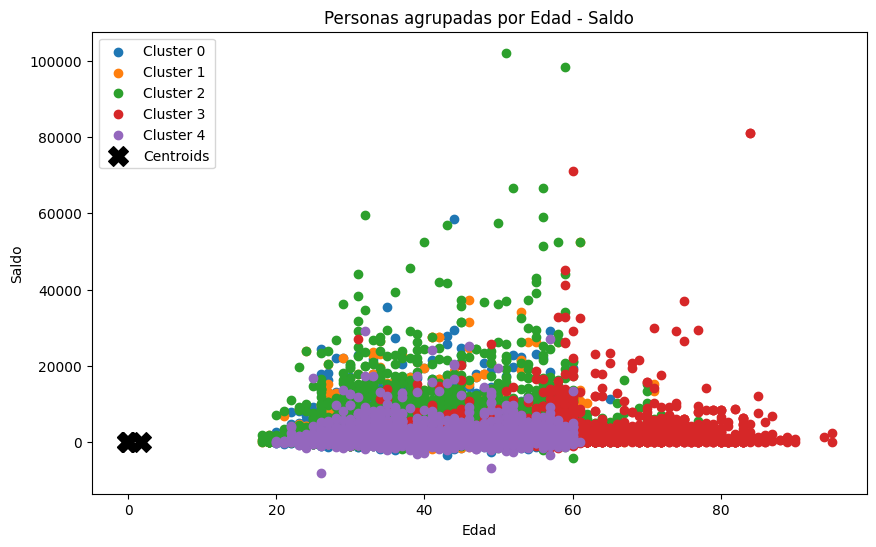

In [14]:
numero_clusters = 5
plt.figure(figsize=(10, 6))
for cluster in range(numero_clusters):
    cluster_data = df_train[df_train['Grupos'] == cluster]
    plt.scatter(cluster_data['edad'], cluster_data['saldo'], label=f'Cluster {cluster}')
plt.scatter(k_means.cluster_centers_[:, 9], k_means.cluster_centers_[:, 8], s=200, c='black', marker='X', label='Centroids')

plt.title('Personas agrupadas por Edad - Saldo')
plt.xlabel('Edad')
plt.ylabel('Saldo')
plt.legend()
plt.show()

In [23]:
grupo_2 = df_train[df_train['Grupos'] == 2]

In [24]:
grupo_2 = grupo_2[grupo_2['saldo'] >= 5000]

In [25]:
grupo_2

,edad,saldo,duracion,campaign,tiempo_transcurrido,contactos_anteriores,trabajo_admin.,trabajo_blue-collar,trabajo_entrepreneur,trabajo_housemaid,...,tipo_contacto_Sin Información,tipo_contacto_fijo,tipo_contacto_movil,resultado_campanas_anteriores_Sin Información,resultado_campanas_anteriores_exito,resultado_campanas_anteriores_otro,resultado_campanas_anteriores_sin_exito,target_no,target_si,Grupos
53,33,14889,22,3,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2
117,41,15302,121,4,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2
121,36,11675,48,1,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2
146,38,14352,8,1,-1,0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2
157,53,6649,83,1,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42339,37,5132,536,8,-1,0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2
42380,45,31630,209,1,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2
42391,26,13107,112,2,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2
42404,42,14282,649,4,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2
